<!-- ENG -->
# Exercises in Fundamentals of Data Science ②

※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.

<!-- ENG -->
　We will work on the following exercise this time.

**DS2.1 | Descriptive and inferential statistics**

**DS2.2 | Drawing diagrams using matplotlib**

　A format for submitting assignments is attached at the end of this document, so please use it when submitting assignments.

<!-- ENG -->
## DS2.1 | Descriptive and inferential statistics


　In a lecture on Fundamentals of Data Science, you learned about **descriptive statistics and inferential statistics**, in which you learned that **sample mean is an unbiased estimator**, while **sample variance is not an unbiased estimator**.

　In this section, we will learn **descriptive statistics: calculation of statistics (sample mean and sample variance) using actual data**, and **inferential statistics: confirmation of the relationship between sample mean / sample variance and population mean / population variance**.


<!-- ENG -->
### DS2.1.0 | Glossary

　Since we will be using a lot of statistical words, we will summarize them before doing the following exercise.

* **Population**\: The entire set that makes up the source of the numeric data, attributes, etc. being studied. It is often expressed as a probability distribution.
* **Population mean**\: The mean for a population. For continuous random variables, it is defined by $\mu=\int xf(x)dx$ for the density function $f(x)$. The same is true for discrete random variables.
* **Sample**\: A specific data set (taken from a population).
* **Sample mean**\: The arithmetic mean obtained for a specific data set.
* **Statistic**\: Numeric values that summarize the characteristics of a data set. Mean and variance are typical examples of statistics.
* **Estimator**\: An estimated quantity of a population parameter based on a specific data set.
* **Unbiased estimator**\: An estimator whose expectations about data generation are guaranteed to match the true parameters representing the population.

In the above explanation, **a data set** is a list of observed data, which is a tabular format consisting of multiple data. 
 


<!-- ENG -->
### DS2.1.1 | Preparing a data set

<!-- ENG -->
#### Download the CSV file (`DS2_iris.csv`) and verify the content

<!-- ENG -->
　The `DS2_iris.csv` data set used this time has a sample size of 150, which is sufficiently visible data, so check the content of the sample (data set) used this time before calculating the descriptive statistics.

　First, let's take a look at the `DS2_iris.csv` file downloaded from OCW-i along with the ipynb file in Excel. (If you don't have access to Excel, you can upload `DS2_iris.csv` to Google Colab and double-click on the uploaded file to view its contents.)


　Browsing `DS2_iris.csv` in Excel (**Figure DS2.1**), we can first see that the data consists of four values and one name, respectively.
A closer look at this sample reveals, for example, the following:

* The Name column has the three names, which are Iris-setosa, Iris-versicolor, and Iris-virginica, and there are 50 of each.
* Looking at PetalWidth, Iris-setosa is always less than 1, but the other two types are always greater than 1.
* Similarly, PetalLength has a smaller value only for Iris-setosa.
* Also, taking a closer look at PetalWidth shows that Iris-virginica has a higher value than Iris-versicolor.

Once you have a visual sense of these features, let's move on to the next section to see them in action using Python.

![Contents of iris.csv](https://i.imgur.com/ElYyxgN.png)

<!-- ENG -->
**Figure DS2.1 | Contents of DS2_iris.csv**



<!-- ENG -->
### DS2.1.1 | Descriptive statistics: Calculating statistics using actual data


<!-- ENG -->
#### Reading files and calculating descriptive statistics using `pandas`

<!-- ENG -->
　Now let's read the file we have just looked at using Excel in Python.
First, upload the CSV file (`DS2_iris.csv`) to Google Colaboratory (instructions on how to upload are provided in “How to use Google Colaboratory”).

　Next, read the CSV file in Python. To read CSV files, use the `pandas` library in Python.
`pandas` is **a library that is frequently used to process tabular samples**, so let's be sure to learn it.

In [ ]:
import pandas as pd            # Prepare the library for use

In [ ]:
df = pd.read_csv("DS2_iris.csv")   # Read the CSV file and name it df
print(df)                          # Try to display the loaded sample (data set) (only a part of it will be displayed)

     SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
print(len(df))                 # Get the sample size (number of data)

150


In [ ]:
print(df["Name"])              #  Get only the Name column

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [ ]:
print(df[df["Name"] == "Iris-setosa"])   # Get all data whose Name is Iris-setosa

    SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0           5.1         3.5          1.4         0.2  Iris-setosa
1           4.9         3.0          1.4         0.2  Iris-setosa
2           4.7         3.2          1.3         0.2  Iris-setosa
3           4.6         3.1          1.5         0.2  Iris-setosa
4           5.0         3.6          1.4         0.2  Iris-setosa
5           5.4         3.9          1.7         0.4  Iris-setosa
6           4.6         3.4          1.4         0.3  Iris-setosa
7           5.0         3.4          1.5         0.2  Iris-setosa
8           4.4         2.9          1.4         0.2  Iris-setosa
9           4.9         3.1          1.5         0.1  Iris-setosa
10          5.4         3.7          1.5         0.2  Iris-setosa
11          4.8         3.4          1.6         0.2  Iris-setosa
12          4.8         3.0          1.4         0.1  Iris-setosa
13          4.3         3.0          1.1         0.1  Iris-setosa
14        

In [ ]:
print(df[df["SepalWidth"] <= 2.5])       # Get all data whose SepalWidth is less than or equal to 2.5

     SepalLength  SepalWidth  PetalLength  PetalWidth             Name
41           4.5         2.3          1.3         0.3      Iris-setosa
53           5.5         2.3          4.0         1.3  Iris-versicolor
57           4.9         2.4          3.3         1.0  Iris-versicolor
60           5.0         2.0          3.5         1.0  Iris-versicolor
62           6.0         2.2          4.0         1.0  Iris-versicolor
68           6.2         2.2          4.5         1.5  Iris-versicolor
69           5.6         2.5          3.9         1.1  Iris-versicolor
72           6.3         2.5          4.9         1.5  Iris-versicolor
80           5.5         2.4          3.8         1.1  Iris-versicolor
81           5.5         2.4          3.7         1.0  Iris-versicolor
87           6.3         2.3          4.4         1.3  Iris-versicolor
89           5.5         2.5          4.0         1.3  Iris-versicolor
93           5.0         2.3          3.3         1.0  Iris-versicolor
98    

In [ ]:
print(df["PetalWidth"].mean())           # Get the sample mean of PetalWidth

1.1986666666666672


In [ ]:
print(df["PetalWidth"].max())            # Get the maximum value of PetalWidth

2.5


<!-- ENG -->
　Let's use the above functions to confirm one feature that we have just seen in Excel.

In [ ]:
## Fact: Looking at PetalWidth, Iris-setosa is always less than 1
## -> Check the maximum value of PetalWidth for the data where Name==Iris-setosa
setosa = df[df["Name"] == "Iris-setosa"]      # Extract the data with Name==Iris-setosa and save it using a different name
print(setosa["PetalWidth"].max())

0.6


<!-- ENG -->
　Executing the above code, we get an output of 0.6. This means that **Iris-setosa's PetalWidth is at most 0.6**, which is certainly less than 1. It is better to process it in two steps like this (while saving with another name) to avoid confusion until you get used to it.

---

<!-- ENG -->
##### Exercise DS2.1

　Enter an appropriate string in the `__xxxxx__` part of the code below to get the minimum value of PetalLength.

　When you submit your assignment, please include the following two points:

* What did you rewrite `__xxxxx__` as?
* Minimum value of PetalLength

In [ ]:
print(df["PetalLength"].min())

1.0


-------

<!-- ENG -->
### DS2.1.2 | Inferential statistics

　Descriptive statistics involves checking various values of an already existing sample, or calculating values (sample mean, minimum value, etc.) that would represent the sample as a whole.
Inferential statistics, on the other hand, is based on the idea that **the sample (data set) you have is a "subset of the population" taken at random from the population**, and aims to clarify properties such as the mean and variance of the population from the sample.

<!-- ENG -->
　I think it's hard to understand with just talking about it, so let's do some actual calculations.
The following code generates 10 cases of data (which corresponds to one sample) from **a normal distribution with mean 1 and variance 1**, and calculates sample mean and sample variance.

In [ ]:
import random

# Generate a single sample consisting of n data
def gen_sample(n):
    sample = []
    for i in range(n):
        sample.append(random.gauss(1,1))
    return sample

<!-- ENG -->
　The following code calculates the sample mean and sample variance for a sample consisting of 10 data points. The results will change each time you run it, so please run it several times.

In [ ]:
import statistics
a_sample = gen_sample(10)

print(statistics.mean(a_sample))
print(statistics.pvariance(a_sample)) # Calculate the sample variance

0.6641309266573486
1.2800744645803706


<!-- ENG -->
　Upon creating this document, and executing it 5 times, the results were obtained where the sample mean was between 0.55 to 1.66 and the sample variance was between 0.74 to 1.07. There seems to be a lot of variation.

　Now, what will be the expected value (mean) of this sample mean and sample variance? We'll generate a lot of samples and calculate the sample mean and sample variance each time, and then try to find the mean.

In [ ]:
sample_means = []
for i in range(10000):
    sample = gen_sample(10)
    sample_mean = statistics.mean(sample)
    sample_means.append(sample_mean)
print(statistics.mean(sample_means))

1.0026915780420207


In [ ]:
sample_variances = []
for i in range(10000):
    sample = gen_sample(10)
    sample_variance = statistics.pvariance(sample)
    sample_variances.append(sample_variance)
print(statistics.mean(sample_variances))

0.8965796055873456


<!-- ENG -->
　Apparently, the expected value (mean) of the sample mean is about 1.0 and the expected value (mean) of the sample variance is about 0.9.
Here, although **the variance of the original distribution was 1**, note that **the mean of the sample variance is 0.9**. In other words, the expected value of the sample variance (mean) does not match the population variance (the variance of the original distribution) (i.e., **the sample variance is not an unbiased estimator of the variance**).

---------


<!-- ENG -->
##### Exercise DS2.2
　In the above verification, the number of samples (not the sample size) was set to 10,000. What changes will occur when the number of samples is changed to 100 or 100,000? Answer the following two questions. (It takes up to 30 seconds to calculate.)
* The accuracy of the output sample mean and sample variance (how close they are to the expected values. A qualitative assessment is fine.)
* Relationship between the number of samples and the time it took for the values to be displayed.

　For measuring the computational time, use the following code.

In [ ]:
import time
time_start = time.time() # Get the current time

for i in range(10000):
  sample = gen_sample(10)
  # CALC SOMETHING
time_end = time.time() # Get the current time
print(time_end - time_start) # Calculate the difference between the start time and end time (in seconds)

0.08505916595458984


### DS2.2 Answer.


Qualitive analysis:
1. Mean precison and variance precision both improved. 
2. Cost more time for compution.

Qauntitive analysis:
* num of samples: 100 => 100000, 
* mean accuracy: 0.0010623711024739801 => 0.0004731211245594391,
* variance accuracy: 0.1028532849638022 =>
* time consumption:

Number of samples and the time consumption is positive correlated.


In [ ]:
import time
time_start = time.time() # Get the current time

sample_means = []
for i in range(100):
    sample = gen_sample(10)
    sample_mean = statistics.mean(sample)
    sample_means.append(sample_mean)
time_end = time.time() # Get the current time

print("sample size: 10 and num of samples: 100")
print("mean: ", statistics.mean(sample_means))
print("precision of mean: ", 1-statistics.mean(sample_means))
print("time(sec): ", time_end - time_start) # Calculate the difference between the start time and end time (in seconds)


sample size: 10 and num of samples: 100
mean:  0.9997454613277622
precision of mean:  0.0002545386722377918
time(sec):  0.0069429874420166016


In [ ]:
import time
time_start = time.time() # Get the current time

sample_variances = []
for i in range(100):
    sample = gen_sample(10)
    sample_variance = statistics.pvariance(sample)
    sample_variances.append(sample_variance)

time_end = time.time() # Get the current time

print("sample size: 10 and num of samples: 10")
print("variance: ", statistics.mean(sample_variances))
print("precision of variance: ", 1-statistics.mean(sample_variances))
print("time: ", time_end - time_start) # Calculate the difference between the start time and end time (in seconds)

sample size: 10 and num of samples: 10
variance:  0.8541069493451907
precision of variance:  0.1458930506548093
time:  0.03222036361694336


In [ ]:
import time
time_start = time.time() # Get the current time

sample_means = []
for i in range(100000):
    sample = gen_sample(10)
    sample_mean = statistics.mean(sample)
    sample_means.append(sample_mean)
time_end = time.time() # Get the current time

print("sample size: 10 and num of samples: 100,000")
print("mean: ", statistics.mean(sample_means))
print("precision of mean: ", 1-statistics.mean(sample_means))
print("time(sec): ", time_end - time_start) # Calculate the difference between the start time and end time (in seconds)

sample size: 10 and num of samples: 100,000
mean:  1.0002126929424586
precision of mean:  -0.00021269294245862547
time(sec):  6.692242860794067


In [ ]:
import time
time_start = time.time() # Get the current time

sample_variances = []
for i in range(100000):
    sample = gen_sample(10)
    sample_variance = statistics.pvariance(sample)
    sample_variances.append(sample_variance)

time_end = time.time() # Get the current time
print("sample size: 10 and num of samples: 100,000")
print("variance: ", statistics.mean(sample_variances))
print("precision of variance: ", 1-statistics.mean(sample_variances))
print("time: ", time_end - time_start) # Calculate the difference between the start time and end time (in seconds)

sample size: 10 and num of samples: 100,000
variance:  0.8985174458301355
precision of variance:  0.10148255416986451
time:  20.862366676330566


<!-- ENG -->
##### Exercise DS2.3
　As we know, `statistics.pvariance(sample)` is function to find the sample variance for a given sample. The `statistics` library also has a function to find the unbiased variance, which is an unbiased estimator. Do a Google search, etc., and answer the name of the function for finding the unbiased variance.
Note, however, that **the official Python documentation, for example, misuses some words such as population variance, sample variance, and so on**, so you need to read the definition of variance and the annotations.

　For students who can find it quickly (not to be graded): Revise the above code to calculate the expected value (mean) of the unbiased variance and make sure that the mean value of the unbiased variance approaches 1.0, which is the population variance.

Answer: statistics.variance()

-------

<!-- ENG -->
　Until now, numerical values ​​have been extracted and displayed, or values ​​such as mean value, minimum value, maximum value, and variance have been calculated. On the other hand, it is very effective to create a diagram to see large data trends.
Here, we will try to create a diagram using another library called matplotlib. Using matplotlib, it is easy to create diagrams such as **Figure DS2.2** and **Figure DS2.3**.


![ヒストグラムの例](https://i.imgur.com/YviFPUt.png)


<!-- ENG -->
**Figure DS2.2 | Histogram example**

![箱ひげ図の例](https://i.imgur.com/xYREV5t.png)

<!-- ENG -->
**Figure DS2.3 | Boxplot example**

<!-- ENG -->
### DS2.2.1 | Preparing to use matplotlib
　The first step is to prepare to use the new library. Execute the `import` statement in the same way as you did with `pandas`.

In [ ]:
import matplotlib.pyplot as plt  

<!-- ENG -->
　We will also prepare to use the same iris data set as before.
If `DS2_iris.csv` has been erased from the folder, perform the upload process again, and then run the following code.

In [ ]:
import pandas as pd
df = pd.read_csv("DS2_iris.csv") # Read the CSV  

<!-- ENG -->
### DS2.2.2 | Drawing a histogram

<!-- ENG -->
　Let's try to draw a histogram using `matplotlib`.
At its simplest, a histogram can be written with the following code.

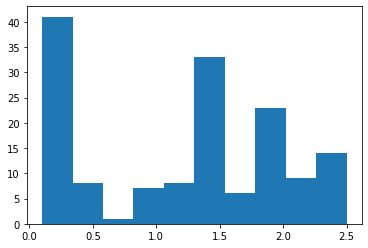

In [ ]:
plt.hist(df["PetalWidth"]) # Enter the data for which you want to draw a histogram in the argument 
                           # of the function hist() that writes the histogram.
plt.show()                 # Use show() to display the figure instead of print()

<!-- ENG -->
　In the above code, the figure does not show what values the $x$-axis and $y$-axis have. To include this in the diagram, you can use `plt.xlabel()` and `plt.ylabel()`.

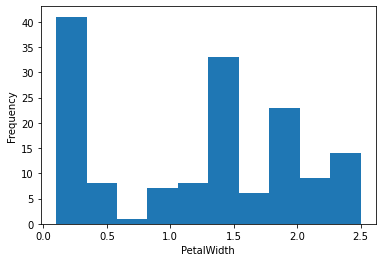

In [ ]:
plt.hist(df["PetalWidth"])
plt.xlabel("PetalWidth")   # Explanation of the x-axis
plt.ylabel("Frequency")    # Explanation of the y-axis
plt.show()

<!-- ENG -->
　By executing this code, we are able to display the same figure as in Figure DS2.2.

　Diagrams created with matplotlib can be saved as images (png, etc.) or PDFs. In this case, instead of the `plt.show()` function, save the file using `plt.savefig(filename)`.

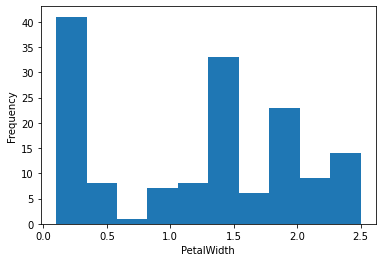

In [ ]:
plt.hist(df["PetalWidth"])
plt.xlabel("PetalWidth")   # Explanation of the x-axis
plt.ylabel("Frequency")    # Explanation of the y-axis
plt.savefig("histogram_pWidth.png") # Depending on the extension, a PDF is generated or an image is generated
### In the case of Google Colab, it will also appear on the screen.

<!-- ENG -->
　The file you created will be displayed in the location where you uploaded the csv file. If you don't see it, click "Refresh" next to the "Upload" button and it should appear.

<!-- ENG -->
### DS2.2.3 | Drawing a boxplot

<!-- ENG -->
　Boxplot is a way to get a rough idea of the distribution of a data set by displaying the following information all at one time.

* Maximum value (excluding outliers)　 : Horizontal line at the top
* 75th percentile (third quartile)　　　　: Top of the box
* 50th percentile (median)　　　　　　: Red line inside the box
* 25th percentile (first quartile)　　　　: Underside of the box
* Minimum value (excluding outliers)　: Horizontal line at the bottom
* Outlier　　　　　　　　　　　　　　: Circle(s)

<!-- ENG -->
　Now, let's draw a boxplot for the PedalWidth of Iris-setosa. At its simplest, the following code can be used to create a boxplot diagram.



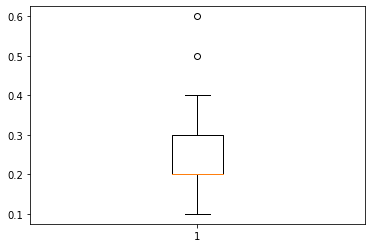

In [ ]:
setosa = df[df["Name"] == "Iris-setosa"]
plt.boxplot(setosa["PetalWidth"])
plt.show()

<!-- ENG -->
　In this case, the first quartile and the median are the same, so the bottom of the box has a red line.

<!-- ENG -->
　Next, let's create a slightly more complex boxplot diagram. The boxplot of PedalWidth for Iris-setosa, Iris-versicolor, and Iris-virginica, respectively, are displayed in the same graph. When inputting multiple data, give them to `plt.boxplot()` **as an array**.

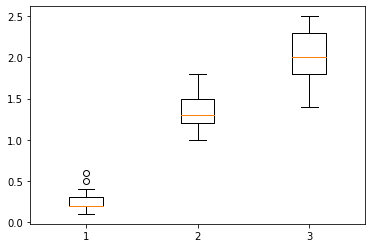

In [ ]:
setosa = df[df["Name"] == "Iris-setosa"]
versicolor = df[df["Name"] == "Iris-versicolor"]
virginica = df[df["Name"] == "Iris-virginica"]

plt.boxplot([setosa["PetalWidth"], versicolor["PetalWidth"], virginica["PetalWidth"]]) # Gather multiple inputs into an array
plt.show()

<!-- ENG -->
　By the way, we don't know which data is which as it is shown as 1, 2, and 3. If you want to display such as "Iris-setosa" here, you can use the `labels` argument of the `plt.boxplot()` function.
 Figure DS2.3 is a diagram created with the following code.

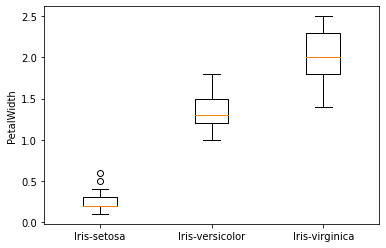

In [ ]:
setosa = df[df["Name"] == "Iris-setosa"]
versicolor = df[df["Name"] == "Iris-versicolor"]
virginica = df[df["Name"] == "Iris-virginica"]

plt.boxplot([setosa["PetalWidth"], versicolor["PetalWidth"], virginica["PetalWidth"]],
            labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.ylabel("PetalWidth")
plt.show() 

<!-- ENG -->
### DS2.2.4 | Drawing a scatter plot

<!-- ENG -->
　Next, we will try creating a scatter plot. Scatter plots are very useful in looking at the relationship between two variables.

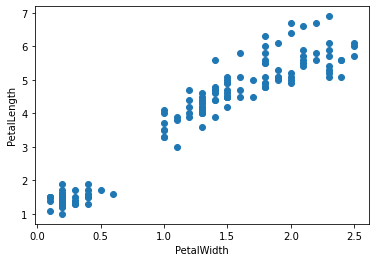

In [ ]:
plt.scatter(df["PetalWidth"], df["PetalLength"])
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")

plt.show()

<!-- ENG -->
　In a scatter plot, a legend can be displayed.

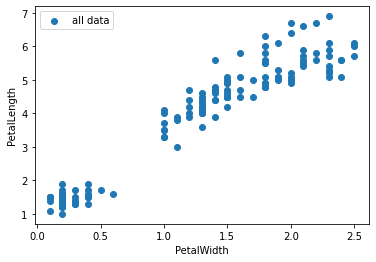

In [ ]:
plt.scatter(df["PetalWidth"], df["PetalLength"], label="all data") #  The label is set to be displayed in the legend
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.legend() # Display a legend
plt.show()

---

<!-- ENG -->
##### Exercise DS2.4

　Add a title to the top of the figure, as shown in **Figure DS2.4**. Making full use of Google search, etc., answer what function should be used, and attach the actual diagram you created.

![図2.4](https://i.imgur.com/m6vQ6sV.png)


<!-- ENG -->


**Figure DS2.4 | Example of drawing including a title (partial)**

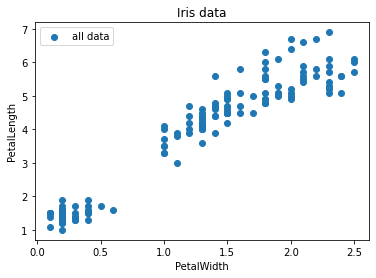

In [ ]:
plt.scatter(df["PetalWidth"], df["PetalLength"], label="all data") #  The label is set to be displayed in the legend
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.title("Iris data") # add title
plt.legend() # Display a legend
plt.show()

---

<!-- ENG -->
##### Exercise DS2.5 (Advanced)
　As with the boxplot, draw the scatter plot showing the distinction between setosa, versicolor, and virginica. Using **Figure DS2.5** as an example, also display a legend in a scatter plot so that the three types of data can be distinguished (the order of the colors can be different from Figure DS2.5).
When submitting, set `plt.rcParams["font.size"]` to make it visible that the font size is different from Figure DS2.5.

![図2.5](https://i.imgur.com/ep8wlSh.png)

<!-- ENG -->
**Figure DS2.5 | Drawing example**

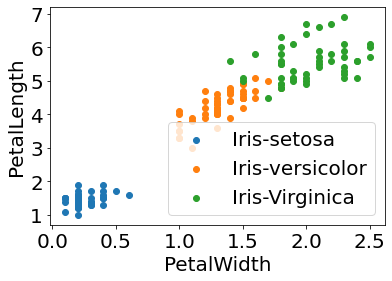

In [ ]:
setosa = df[df["Name"] == "Iris-setosa"]
versicolor = df[df["Name"] == "Iris-versicolor"]
virginica = df[df["Name"] == "Iris-virginica"]

plt.scatter(setosa["PetalWidth"], setosa["PetalLength"], label="Iris-setosa") #  The label is set to be displayed in the legend
plt.scatter(versicolor["PetalWidth"], versicolor["PetalLength"], label="Iris-versicolor") 
plt.scatter(virginica["PetalWidth"], virginica["PetalLength"], label="Iris-Virginica") 

plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
#plt.title("Iris data") # add title
plt.legend() # Display a legend
plt.rcParams["font.size"] = 5
plt.show()

---

<!-- ENG -->

# Report submissions



<!-- ENG -->
## How to submit reports

　The report should be submitted **as a single file (.doc, .docx, .pdf)** using the **answer sheet template**, **with your confirmed student ID number and name** **via OCW-i on the Tokyo Institute of Technology Portal by the start of the next Exercise in the Fundamentals of Data Science**.
After uploading the file, be sure to check that the "Submitted" icon is displayed on OCW-i. Otherwise, it will be treated as unsubmitted.
Also, be sure to submit your work with plenty of time to spare as files cannot be submitted after the deadline.


<!-- ENG -->
## Answer Sheet Template

```
Student ID number:
Name:

Exercise DS2.1
`__xxxxx__` = ______________
Minimum value of PetalLength: ________

Exercise DS2.2
Accuracy of the output value:
　_____________________________________
Relationship between the number of samples and the time it took for the values to be displayed:
　_____________________________________

Exercise DS2.3
The name of the function to find the unbiased variance is "________________".

Exercise DS2.4
If you write plt.______(______), you can display the title "Iris data".

(Place the diagram here)

Exercise DS2.5

(Place the diagram here)

```

<!-- ENG -->
# Supplementary Material

## S1: Various diagrams that can be created with matplotlib

matplotlib is capable of creating various other diagrams, or complex diagrams. Please refer to the [matplotlib tutorials](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) and other resources.
